In [1]:
# Python modules
import json
import sys

In [2]:
# third-party modules
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

In [6]:
def depthViz(filename, vizKind):
    fi = open(filename)

    data = json.load(fi)
    df = pd.DataFrame(data["draw_trace"])
    df.index.name = 'time'

    if (vizKind == "displot"): sns.displot(data = df, x = "depth", binwidth = 1, kde = True)
    if (vizKind == "catplot"): sns.catplot(data = df, y = "supplier", x = "depth", kind = "violin", inner = None, linewidth = 0)
    if (vizKind == "scatterplot"): 
        sns.scatterplot(data = df, y = "supplier", x = "dependency", size = "depth", sizes=(20, 200), hue = "time")
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    if (vizKind == "relplot"): sns.relplot(data = df, x = "time", y = "depth", kind = "line", hue = "supplier")

    plt.xticks(rotation = 90, size = 8)
    plt.title(filename)
    plt.show()

    fi.close()

In [7]:
filename = "data-varna-startup-shutdown_parsed.json"
#filename = "data-varna-copy-paste-isolated_parsed.json"
#filename = "data-imagej-copy-paste_parsed.json"
#filename = "data-jedit-copy-paste_parsed.json"
#filename = "data-jedit-find-replace_parsed.json"

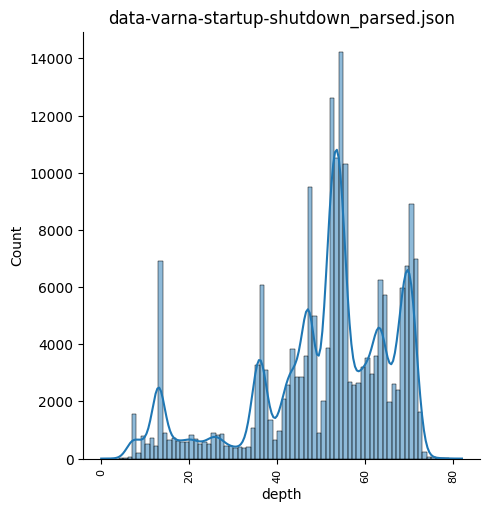

In [8]:
depthViz(filename, "displot")

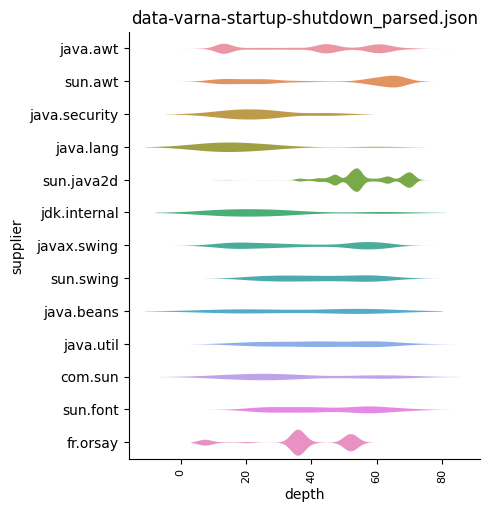

In [9]:
depthViz(filename, "catplot")

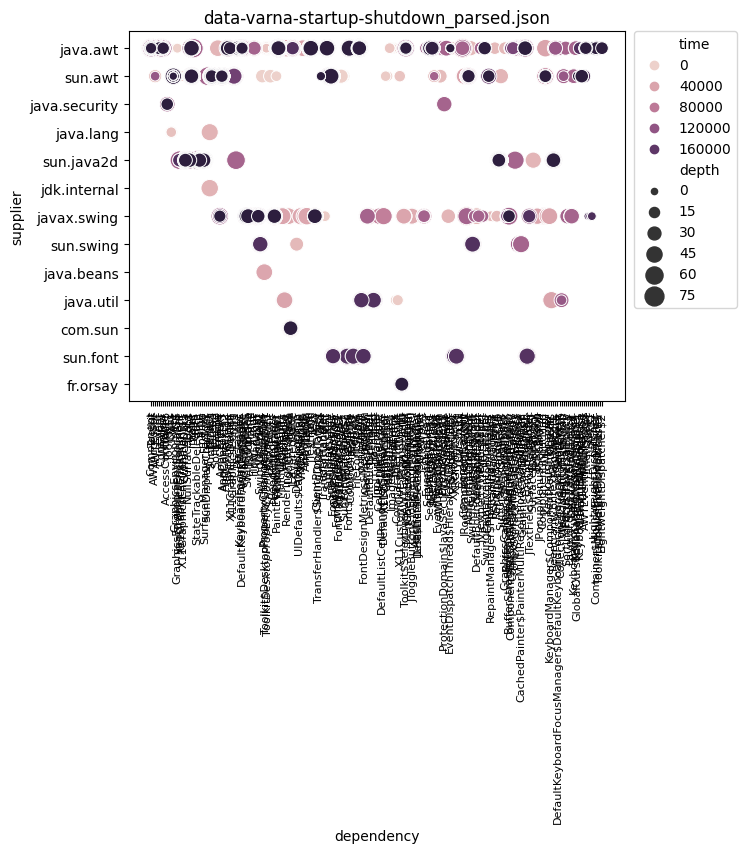

In [10]:
depthViz(filename, "scatterplot")

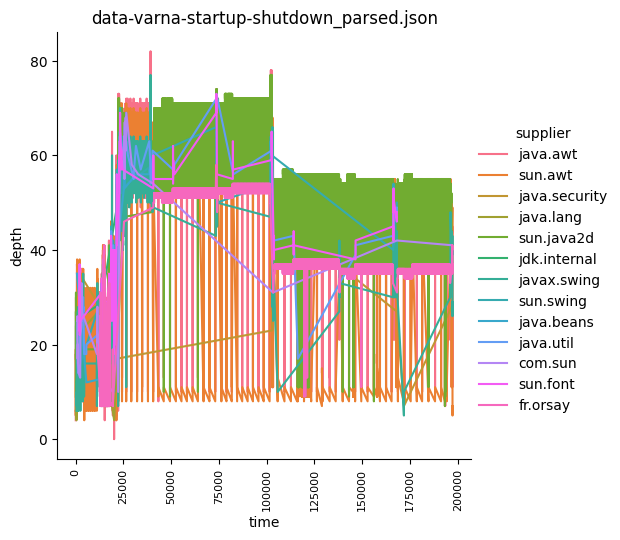

In [11]:
depthViz(filename, "relplot")